# Lowercasing

In [1]:
text=['This is introduction to NLP',
      'It is likely to be useful,to people ',
      'Machine learning is the new electrcity',
      'There would be less hype around AI and more action going forward',
      'python is the best tool!','R is good langauage',
      'I like this book',
      'I want more books like this']

In [2]:
#convert list to data frame
import pandas as pd
df = pd.DataFrame({'tweet':text})
df

,tweet
0,This is introduction to NLP
1,"It is likely to be useful,to people"
2,Machine learning is the new electrcity
3,There would be less hype around AI and more ac...
4,python is the best tool!
5,R is good langauage
6,I like this book
7,I want more books like this


In [3]:
df['tweet'] = df['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['tweet']

0                          this is introduction to nlp
1                  it is likely to be useful,to people
2               machine learning is the new electrcity
3    there would be less hype around ai and more ac...
4                             python is the best tool!
5                                  r is good langauage
6                                     i like this book
7                          i want more books like this
Name: tweet, dtype: object

# Removing Punctuation

This step is very important as punctuation doesn’t add any extra
information or value. Hence removal of all such instances will help reduce
the size of the data and increase computational efficiency.

In [ ]:
# The simplest way to do this is by using the regex and replace() function in Python.

In [5]:
text=['This is introduction to NLP','It is likely to be useful, to people ','Machine learning is the new electrcity',
'There would be less hype around AI and more action going forward','python is the best tool!','R is good langauage',
'I like this book','I want more books like this']

In [8]:
#convert list to dataframe
import pandas as pd
df = pd.DataFrame({'text':text})
print(df)

                                                text
0                        This is introduction to NLP
1              It is likely to be useful, to people 
2             Machine learning is the new electrcity
3  There would be less hype around AI and more ac...
4                           python is the best tool!
5                                R is good langauage
6                                   I like this book
7                        I want more books like this


In [14]:
# Using the regex and replace() function, we can remove the punctuation
# as shown below:
import re
df['text'] = df['text'].str.replace(r'[^\w\s]','')
df['text']

C:\Users\pooya\AppData\Local\Temp\ipykernel_2376\4146421088.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace(r'[^\w\s]','')


0                          This is introduction to NLP
1                 It is likely to be useful to people 
2               Machine learning is the new electrcity
3    There would be less hype around AI and more ac...
4                              python is the best tool
5                                  R is good langauage
6                                     I like this book
7                          I want more books like this
Name: text, dtype: object

In [18]:
# or :
import string
s = "I. like. This book!"
for c in string.punctuation:
    s= s.replace(c," ")
s

'I  like  This book '

# Removing Stop Words

In [31]:
# Stop words are very common words that carry no meaning or less meaning compared to other keywords.

# The simplest way to do this by using the NLTK library, or you can build
# your own stop words file.

In [32]:
text=['This is introduction to NLP','It is likely to be useful, to people ','Machine learning is the new electrcity',
'There would be less hype around AI and more action going forward',
      'python is the best tool!','R is good langauage','I like this book','I want more books like this']

#convert list to data frame
import pandas as pd
df = pd.DataFrame({'text':text})
print(df)

                                                text
0                        This is introduction to NLP
1              It is likely to be useful, to people 
2             Machine learning is the new electrcity
3  There would be less hype around AI and more ac...
4                           python is the best tool!
5                                R is good langauage
6                                   I like this book
7                        I want more books like this


In [34]:
import nltk
# nltk.download()
from nltk.corpus import stopwords

In [35]:
#remove stop words
stop = stopwords.words('english')

In [36]:
df['text'] = df['text'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop))
df['text']

0                                This introduction NLP
1                             It likely useful, people
2                      Machine learning new electrcity
3    There would less hype around AI action going f...
4                                    python best tool!
5                                     R good langauage
6                                          I like book
7                                    I want books like
Name: text, dtype: object

# Standardizing Text

there is a high chance of people using short words and abbreviations to
represent the same meaning. This may help the downstream process to easily
understand and resolve the semantics of the text.

In [37]:
#The dictionary will be for text standardization based on your data.
lookup_dict = {'nlp':'natural language processing','ur':'your', "wbu" : "what about you"}
import re

In [44]:
def text_std(input_text):
    words = input_text.split()
    new_words = []
    for word in words:
        word = re.sub(r'[^\w\s]','',word)
        if word.lower() in lookup_dict:
            word = lookup_dict[word.lower()]
            new_words.append(word)
            #new_text = " ".join(new_words)
    return new_words

In [45]:
# Run the text_std function
# We also need to check the output:
text_std("I like nlp it's ur choice")  # Here, nlp has standardised to 'natural language processing' and ur to 'your'.


['natural language processing', 'your']

# Spelling correction

Most of the text data is in the form of either customer reviews, blogs, or
tweets, where there is a high chance of people using short words and
making typo errors. This will help us in reducing multiple copies of words,
which represents the same meaning. For example, “proccessing” and
“processing” will be treated as different words even if they are used in the same sense.
abbreviations should be handled before this step, or else the corrector would fail at times.
Say, for example, “ur” (actually means “your”) would be corrected to “or.”

In [ ]:
# The simplest way to do this by using the TextBlob library.

In [48]:
text=['Introduction to NLP','It is likely to be useful, to people ','Machine learning is the new electrcity',
      'R is good langauage','I like this book','I want more books like this']
#convert list to dataframe
import pandas as pd
df = pd.DataFrame({'text':text})
df['text']

0                       Introduction to NLP
1     It is likely to be useful, to people 
2    Machine learning is the new electrcity
3                       R is good langauage
4                          I like this book
5               I want more books like this
Name: text, dtype: object

In [49]:
from textblob import TextBlob
df['text'].apply(lambda x: str(TextBlob(x).correct()))  #If you clearly observe this, it corrected the spelling of electricity and language.

0                        Introduction to NLP
1      It is likely to be useful, to people 
2    Machine learning is the new electricity
3                         R is good language
4                           I like this book
5                I want more books like this
Name: text, dtype: object

In [51]:
#You can also use autocorrect library as shown below
#install autocorrect
# !pip install autocorrect


In [54]:
from autocorrect import spell
print(spell(u'mussage'))
print(spell(u'sirvice'))


autocorrect.spell is deprecated,             use autocorrect.Speller instead
message
autocorrect.spell is deprecated,             use autocorrect.Speller instead
service


# Tokenization


Tokenization refers to splitting text into minimal meaningful units. There are a sentence tokenizer
and word tokenizer. There are many libraries to perform tokenization like NLTK, SpaCy, and TextBlob.
Here are a few ways to achieve it.

In [55]:
text=['This is introduction to NLP','It is likely to be useful, to people ','Machine learning is the new electrcity',
'There would be less hype around AI and more action going forward','python is the best tool!','R is good langauage',
'I like this book','I want more books like this']
#convert list to dataframe
import pandas as pd
df = pd.DataFrame({'text':text})
df 

,text
0,This is introduction to NLP
1,"It is likely to be useful, to people"
2,Machine learning is the new electrcity
3,There would be less hype around AI and more ac...
4,python is the best tool!
5,R is good langauage
6,I like this book
7,I want more books like this


In [59]:
#Using textblob
from textblob import TextBlob
TextBlob(df['text'][3]).words



WordList(['There', 'would', 'be', 'less', 'hype', 'around', 'AI', 'and', 'more', 'action', 'going', 'forward'])

In [60]:
#using NLTK
import nltk

mystring = "My favorite animal is cat"
nltk.word_tokenize(mystring)

['My', 'favorite', 'animal', 'is', 'cat']

In [61]:
#using split function from python
mystring.split()

['My', 'favorite', 'animal', 'is', 'cat']

In [64]:
TextBlob(mystring).words

WordList(['My', 'favorite', 'animal', 'is', 'cat'])

# Stemming

In this recipe, we will discuss stemming. Stemming is a process of
extracting a root word. For example, “fish,” “fishes,” and “fishing” are
stemmed into fish.

In [ ]:
# The simplest way to do this by using NLTK or a TextBlob library.

In [69]:
text=['I like fishing','I eat fish','There are many fishes in pound']
#convert list to dataframe
import pandas as pd
df = pd.DataFrame({'text':text})
print(df)

                             text
0                  I like fishing
1                      I eat fish
2  There are many fishes in pound


In [70]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['text'].apply(lambda x: " ".join([st.stem(word) for
word in x.split()]))

0                     i like fish
1                      i eat fish
2    there are mani fish in pound
Name: text, dtype: object

# Lemmatizing

Lemmatization is a process of extracting a root word by considering the vocabulary. For example, “good,”
“better,” or “best” is lemmatized into good.
The part of speech of a word is determined in lemmatization. It will
return the dictionary form of a word, which must be a valid word while
stemming just extracts the root word.\

Lemmatization can get better results.
• The stemmed form of leafs is leaf.
• The stemmed form of leaves is leav.
• The lemmatized form of leafs is leaf.
• The lemmatized form of leaves is leaf.


In [71]:
# The simplest way to do this is by using NLTK or the TextBlob library.

In [83]:
text=['I like fishing','I eat fish','There are many fishes in pound', 'leaves and leaf']

#convert list to dataframe
import pandas as pd
df = pd.DataFrame({'text':text})
print(df)

                             text
0                  I like fishing
1                      I eat fish
2  There are many fishes in pound
3                 leaves and leaf


In [84]:
from textblob import Word

In [86]:
df['text'] = df['text'].apply(lambda x: ''.join([Word(word).lemmatize() for word in x.split()]))
df['text']

0               Ilikefishing
1                   Ieatfish
2    Therearemanyfishinpound
3                leafandleaf
Name: text, dtype: object

# Exploring Text Data

In [ ]:
# The simplest way to do this by using NLTK or the TextBlob library.

In [87]:
import nltk
from nltk.corpus import webtext
nltk.download('webtext')
wt_sentences = webtext.sents('firefox.txt')
wt_words = webtext.words('firefox.txt')

[nltk_data] Downloading package webtext to
[nltk_data]     C:\Users\pooya\AppData\Roaming\nltk_data...
[nltk_data]   Package webtext is already up-to-date!


In [88]:
wt_words

['Cookie', 'Manager', ':', '"', 'Don', "'", 't', ...]

In [89]:
wt_sentences

[['Cookie', 'Manager', ':', '"', 'Don', "'", 't', 'allow', 'sites', 'that', 'set', 'removed', 'cookies', 'to', 'set', 'future', 'cookies', '"', 'should', 'stay', 'checked', 'When', 'in', 'full', 'screen', 'mode', 'Pressing', 'Ctrl', '-', 'N', 'should', 'open', 'a', 'new', 'browser', 'when', 'only', 'download', 'dialog', 'is', 'left', 'open', 'add', 'icons', 'to', 'context', 'menu', 'So', 'called', '"', 'tab', 'bar', '"', 'should', 'be', 'made', 'a', 'proper', 'toolbar', 'or', 'given', 'the', 'ability', 'collapse', '/', 'expand', '.'], ['[', 'XUL', ']', 'Implement', 'Cocoa', '-', 'style', 'toolbar', 'customization', '.'], ...]

In [92]:
len(wt_sentences) , len(wt_words)

(1138, 102457)

In [90]:
#Import Library for computing frequency
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import string

In [93]:
# Compute the frequency of all words in the reviews
frequency_dist = nltk.FreqDist(wt_words)
frequency_dist

FreqDist({'.': 2428, 'in': 2203, 'to': 2130, '"': 1971, 'the': 1762, "'": 1507, 'not': 1472, '-': 1372, 'when': 1255, 'on': 1193, ...})

In [110]:
sorted_frequency_dist =sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)
# sorted_frequency_dist

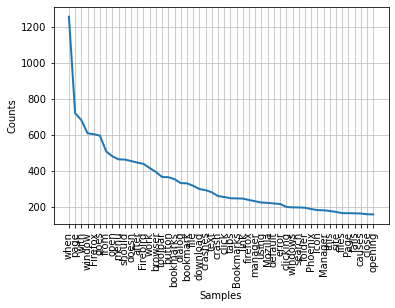

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [96]:
# take the words only if their frequency is greater than 3.

large_words = dict([(k,v) for k,v in frequency_dist.items() if len(k)>3])
frequency_dist = nltk.FreqDist(large_words)
frequency_dist.plot(50,cumulative=False)

In [98]:
# Build Wordcloud
# Wordcloud is the pictorial representation of the most frequently repeated
# words representing the size of the word.

# !pip install wordcloud

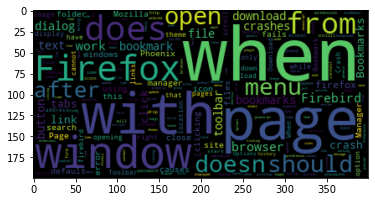

In [99]:
from wordcloud import WordCloud
wcloud = WordCloud().generate_from_frequencies(frequency_dist)
#plotting the wordcloud
import matplotlib.pyplot as plt
plt.imshow(wcloud, interpolation='bilinear')


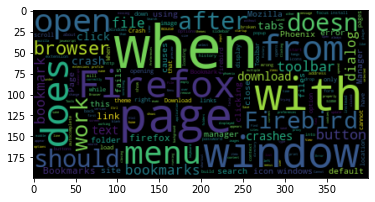

In [111]:
# Remove the stop words and then build the word cloud.

wt_words = webtext.words('firefox.txt')
frequency_dist = nltk.FreqDist(wt_words)
stop = stopwords.words('english')


#large_words = dict([(k,v) for k,v in frequency_dist.items() if len(k)>3])
new_words = dict([(k,v) for k,v in frequency_dist.items() if len(k)>3 and v not in stop])

frequency_dist = nltk.FreqDist(new_words)
wcloud = WordCloud().generate_from_frequencies(frequency_dist)

import matplotlib.pyplot as plt
plt.imshow(wcloud, interpolation='bilinear')

# Building a Text Preprocessing Pipeline

In [143]:
import re
import nltk
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import Word
from nltk.util import ngrams
import re
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize

def processRow(row):
    tweet = row
    #Lower case
    tweet.lower()
    #Removes unicode strings like "\u002c" and "x96"
    tweet = re.sub(r'(\\u[0-9A-Fa-f]+)',r'', tweet)
    tweet = re.sub(r'[^\x00-\x7f]',r'',tweet)
    #convert any url to URL
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',tweet)
    #Convert any @Username to "AT_USER"
    tweet = re.sub('@[^\s]+','AT_USER',tweet)
    #Remove additional white spaces
    tweet = re.sub('[\s]+', ' ', tweet)
    tweet = re.sub('[\n]+', ' ', tweet)
    #Remove not alphanumeric symbols white spaces
    tweet = re.sub(r'[^\w]', ' ', tweet)
    #Removes hastag in front of a word """
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    #Remove :( or :)
    tweet = tweet.replace(':)','')
    tweet = tweet.replace(':(','')
    #remove numbers
    tweet = ''.join([i for i in tweet if not i.isdigit()])
    #remove multiple exclamation
    tweet = re.sub(r"(\!)\1+", ' ', tweet)
    #remove multiple question marks
    tweet = re.sub(r"(\?)\1+", ' ', tweet)
    #remove multistop
    tweet = re.sub(r"(\.)\1+", ' ', tweet)
    #lemma
    from textblob import Word
    tweet =" ".join([Word(word).lemmatize() for word in tweet.split()])                                        
    #stemmer
    #st = PorterStemmer()
    #tweet=" ".join([st.stem(word) for word in tweet.split()])
    #Removes emoticons from text
    tweet = re.sub(':\)|;\)|:-\)|\(-:|:-D|=D|:P|xD|X-p|\^\^|:-*|\^\.\^|\^\-\^|\^\_\^|\,-\)|\)-:|:\'\(|:\(|:-\(|:\S|T\.T|\.\_\.|:<|:-\S|:-<|\*\-\*|:O|=O|=\-O|O\.o|XO|O\_O|:-\@|=/|:/|X\-\(|>\.<|>=\(|D:', '', tweet)
    #trim
    tweet = tweet.strip('\'"')
    row = tweet
    return row

tweet_sample= "How to take control of your #debt https://personal.vanguard.com/us/insights/saving-investing/debt-management.#Best advice for #family #financial #success (@PrepareToWin)"
processRow(tweet_sample)

'How to take control of your debt URL advice for family financial success AT_USER'